## ABSTRACT

In this assignment, we are extracting data from three different sources mainly Web Scraping, Web API's and CSV and creating a conceptual relation between three different data files. After collecting data from all three sources, we will be performing tests on all datasets to prove they are error-free and consistent. Following this, we will be splitting this into three tables with relevant attributes

## DATA THEME

This assignment's theme is based on "ICC Test Cricket Best Batsman" 

## DATA
Data mentioned below is from Web Scraping
The attributes of this are:
Rank
Player Name
Country
Points

# Datasource 1 - Web Scraping using Beautiful Soup

### What is Beautiful Soup

Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping.

### Website used for scraping data
https://www.icc-cricket.com/rankings/mens/player-rankings/test/batting

### Importing Libraries

In [77]:
from bs4 import BeautifulSoup

import requests
import csv

### Importing the dataset

In [78]:
source = requests.get('https://www.icc-cricket.com/rankings/mens/player-rankings/test/batting').text
soup = BeautifulSoup(source, 'html5lib')

In [79]:
#Creating a new CSV file and adding attributes to it
csv_file = open('ICC_scrappe.csv', 'w+')

csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Rank', 'Player_Name', 'Country', "Ratings"])

34

In [80]:
# print(pool.prettify())
pool = soup.find('tbody', class_='js-list-container')

In [81]:
#Scraping all attributes from websites
rank = pool.find('tr', class_='table-body rankings-table__hero').find('td', class_='table-body__cell '
                                                                                   'table-body__cell--position').text
print(rank.strip())

player_name = pool.tr.find('td', class_='table-body__cell rankings-table__player').find('div', class_='name').text
print(player_name)

country = pool.find('td', class_='table-body__cell rankings-table__player').find('div', class_="rankings-table__player-info").find('div', class_='nationality-logo').text
print(country.strip())

points = pool.tr.find('td', class_='table-body__cell u-text-right rating').text
print(points)

csv_writer.writerow([rank.strip(), player_name, country.strip(), points])
print()

results = soup.find('tbody', class_='js-list-container').findChildren("tr", recursive=False)
#Iterating and printing all rows from website
for player in results[1:]:
    # print(player)
    rank = player.find('td', class_='table-body__cell table-body__cell--position').text
    print(rank.strip()) 


    player_name = player.find('td', class_='table-body__cell u-text-left name')

    print(player_name.text) 

    country = player.find('td', class_='table-body__cell u-text-left nationality-logo rankings-table__team').text
    print(country.strip()) 
    points = player.find('td', class_='table-body__cell u-text-right rating').text
    print(points) 

    print()
    
    csv_writer.writerow([rank.strip(), player_name.text, country.strip(), points])
csv_file.close()

1
Virat Kohli
IND
928

2
Steve Smith
AUS
911

3
Marnus Labuschagne
AUS
827

4
Kane Williamson
NZ
814

5
David Warner
AUS
793

6
Cheteshwar Pujara
IND
791

7
Babar Azam
PAK
767

8
Joe Root
ENG
764

9
Ajinkya Rahane
IND
759

10
Ben Stokes
ENG
718

11
Quinton de Kock
SA
706

12
Mayank Agarwal
IND
700

13
Rohit Sharma
IND
688

14
Dimuth Karunaratne
SL
680

15
Tom Latham
NZ
675

16
Ross Taylor
NZ
669

17
Henry Nicholls
NZ
667

18
Angelo Mathews
SL
658

19
Asad Shafiq
PAK
655

20
BJ Watling
NZ
646

21
Travis Head
AUS
643

22
Brendan Taylor
ZIM
632

23
Kusal Mendis
SL
628

24
Dean Elgar
SA
624

25
Mushfiqur Rahim
BAN
614

26
Tamim Iqbal
BAN
613

27
Azhar Ali
PAK
610

28
Aiden Markram
SA
608

29
Rishabh Pant
IND
602

30
Francois du Plessis
SA
586

31
Usman Khawaja
AUS
584

32
Rory Burns
ENG
579

33
Niroshan Dickwella
SL
578

34
Jason Holder
WI
570

35
Dinesh Chandimal
SL
562

36
Dhananjaya de Silva
SL
561

37
Ravindra Jadeja
IND
560

38
Colin de Grandhomme
NZ
557

39
Shan Masood
PAK
553

40
Jo

# Datasource 2 - Using API

### What is an API
An application programming interface is an interface or communication protocol between different parts of a computer program intended to simplify the implementation and maintenance of software. An API may be for a web-based system, operating system, database system, computer hardware, or software library.

### Importing Libraries

In [82]:
import twitter
import pandas as pd

### Using authorisation keys provided by twitter and assigning to twitter_api variable

In [83]:
CONSUMER_KEY = 'auTIVP4hHiJA7Snb4XYWWEofR'
CONSUMER_SECRET = 'VeoKqZ1twMgYaxTSNB6MRO6dvg112BYuTajEZJMw8gzutjpDKR'
OAUTH_TOKEN = '1121864797-GyTUHsApFDjZGoP4ovCDXudSq48wXUXGiBwVczo'
OAUTH_TOKEN_SECRET = 'I5FK5vwn70xskQTgHema1VzAZLoHZIR1NDlTXHfvuTSVS'

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)
print(twitter_api)

### Getting details of all the players from twitter and printing them in a table

In [84]:
# print(twitter_api.statuses.user_timeline(screen_name="@imVkohli"))

Top_ten_Test_Batsmen = ["@imVkohli", "@stevesmith49", "@marnus3cricket", "@NotNossy", "@davidwarner31",
                        "@cheteshwar1", "@babarazam258", "@ajinkyarahane88", "@root66", "@benstokes38"]

player_name = []
twitter_id = []
followers = []
friends = []
verify = []

#Using for loop to iterate and print all values
for i in Top_ten_Test_Batsmen:
    twitter_id.append(i)
    player_name.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['name'])
    followers.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['followers_count'])
    friends.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['friends_count'])
    verify.append(twitter_api.statuses.user_timeline(screen_name=i)[1]['user']['verified'])

Twitter_Specifications = pd.DataFrame({
             'Player Name': player_name,
             'Twitter ID': twitter_id,
             'Followers Count': followers,
             'Friends Count': friends,
             'Verified': verify})

Twitter_Specifications

,Player Name,Twitter ID,Followers Count,Friends Count,Verified
0,Virat Kohli,@imVkohli,33594949,58,True
1,Steve Smith,@stevesmith49,1707259,474,True
2,Marnus Labuschagne,@marnus3cricket,4238,120,False
3,Kane Williamson,@NotNossy,41951,1090,False
4,David Warner,@davidwarner31,2012058,585,True
5,cheteshwar pujara,@cheteshwar1,2357452,32,True
6,Babar Azam,@babarazam258,1292395,72,True
7,Ajinkya Rahane,@ajinkyarahane88,5745175,70,True
8,Joe Root,@root66,731631,534,True
9,Ben Stokes,@benstokes38,717473,804,True


### To check if any twitter values are duplicated

In [85]:
Twitter_Specifications.duplicated(['Twitter ID'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

As we see, the value displayed is false for each and every 'twitter id'. Hence, its proved that there are no duplicate values in the dataset

### To find any missing values

In [86]:
Twitter_Specifications.isnull().sum()

Player Name        0
Twitter ID         0
Followers Count    0
Friends Count      0
Verified           0
dtype: int64

### To check if attribute Twitter ID is unique

In [87]:
Twitter_Specifications['Twitter ID'].is_unique

True

# Data Visualization

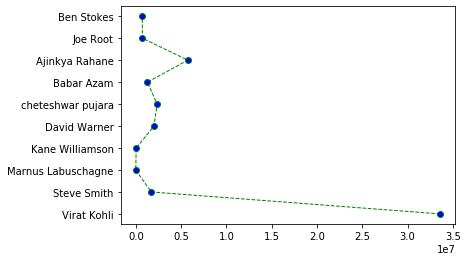

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

x = Twitter_Specifications['Followers Count']
y = Twitter_Specifications['Player Name']
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=6)


plt.show()

# Datasource 3 - Using Raw data

In [89]:
import pandas as pd
df7= pd.read_excel('ICC_players.xlsx')
df7

,Player Name,Twitter ID,Matches,Runs_Scored,Batting_average,Top_score
0,Virat Kohli,@imVkohli,84,7202,54.97,254
1,Steve Smith,@stevesmith49,73,7227,62.84,239
2,Marnus Labuschagne,@marnus3cricket,14,1459,63.43,215
3,Kane Williamson,@NotNossy,78,6379,51.44,242
4,David Warner,@davidwarner31,84,7244,48.94,335
5,Cheteshwar Pujara,@cheteshwar1,75,5740,49.48,206
6,Babar Azam,@babarazam258,25,1707,42.67,127
7,Ajinkya Rahane,@ajinkyarahane88,63,4112,43.74,188
8,Joe Root,@root66,92,7599,48.40,254
9,Ben Stokes,@benstokes38,63,4056,36.54,258


## To find any missing values

In [90]:
df7.isnull().any()

Player Name        False
Twitter ID         False
Matches            False
Runs_Scored        False
Batting_average    False
Top_score          False
dtype: bool

### Checking the columns present in the data

In [91]:
df7.columns

Index(['Player Name', 'Twitter ID', 'Matches', 'Runs_Scored',
       'Batting_average', 'Top_score'],
      dtype='object')

# Conceptual Model

In [92]:
#Datasource 1
Twitter_Specifications

,Player Name,Twitter ID,Followers Count,Friends Count,Verified
0,Virat Kohli,@imVkohli,33594949,58,True
1,Steve Smith,@stevesmith49,1707259,474,True
2,Marnus Labuschagne,@marnus3cricket,4238,120,False
3,Kane Williamson,@NotNossy,41951,1090,False
4,David Warner,@davidwarner31,2012058,585,True
5,cheteshwar pujara,@cheteshwar1,2357452,32,True
6,Babar Azam,@babarazam258,1292395,72,True
7,Ajinkya Rahane,@ajinkyarahane88,5745175,70,True
8,Joe Root,@root66,731631,534,True
9,Ben Stokes,@benstokes38,717473,804,True


In [93]:
#Datasource 2
df7

,Player Name,Twitter ID,Matches,Runs_Scored,Batting_average,Top_score
0,Virat Kohli,@imVkohli,84,7202,54.97,254
1,Steve Smith,@stevesmith49,73,7227,62.84,239
2,Marnus Labuschagne,@marnus3cricket,14,1459,63.43,215
3,Kane Williamson,@NotNossy,78,6379,51.44,242
4,David Warner,@davidwarner31,84,7244,48.94,335
5,Cheteshwar Pujara,@cheteshwar1,75,5740,49.48,206
6,Babar Azam,@babarazam258,25,1707,42.67,127
7,Ajinkya Rahane,@ajinkyarahane88,63,4112,43.74,188
8,Joe Root,@root66,92,7599,48.40,254
9,Ben Stokes,@benstokes38,63,4056,36.54,258


### Combining above two datasets over common key('Twitter Id') and data remains consistent

In [94]:
data_merge12 = pd.merge(Twitter_Specifications, df7, left_on='Twitter ID', right_on='Twitter ID')
del data_merge12 ['Player Name_y']
data_merge12

,Player Name_x,Twitter ID,Followers Count,Friends Count,Verified,Matches,Runs_Scored,Batting_average,Top_score
0,Virat Kohli,@imVkohli,33594949,58,True,84,7202,54.97,254
1,Steve Smith,@stevesmith49,1707259,474,True,73,7227,62.84,239
2,Marnus Labuschagne,@marnus3cricket,4238,120,False,14,1459,63.43,215
3,Kane Williamson,@NotNossy,41951,1090,False,78,6379,51.44,242
4,David Warner,@davidwarner31,2012058,585,True,84,7244,48.94,335
5,cheteshwar pujara,@cheteshwar1,2357452,32,True,75,5740,49.48,206
6,Babar Azam,@babarazam258,1292395,72,True,25,1707,42.67,127
7,Ajinkya Rahane,@ajinkyarahane88,5745175,70,True,63,4112,43.74,188
8,Joe Root,@root66,731631,534,True,92,7599,48.40,254
9,Ben Stokes,@benstokes38,717473,804,True,63,4056,36.54,258


# ER MODEL

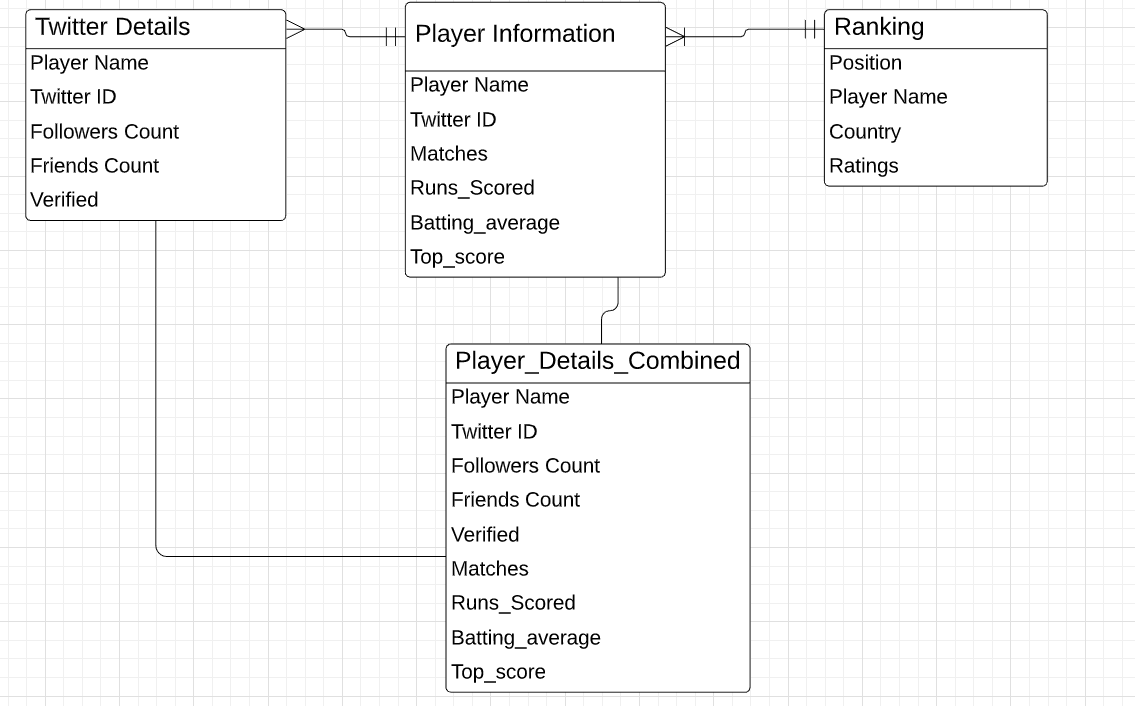

In [95]:
from IPython.display import Image
Image("Entity Relationship Diagram.png")


The above figure shows us an entity relationship model of three different tables from the following: data from Twitter Details, data from Player Information and data from Ranking. We can infer that twitter id acts as a primary key i.e it is unique in all the tables and primary key twitter id holds the two tables twitter details and player information together. Thus we can conclude that on merging the two tables, we get one table Player_Details_Combined which defines a combined data set of values from different places yet relatable, which is known as a conceptual database schema.  

### AUDIT VALIDITY/ACCURACY

The acquired data is said to be valid when it doesn’t contain any null values. Using Python, we checked for null values and duplicate values in the data.
Only the top 10 rows were selected from all 3 sources and was found to have no null values. The rest of the unwanted rows were removed since the ranking were missing, making the final data valid and accurate.


### AUDIT COMPLETNESS

The data collected were obtained from genuine websites and are real world data. The data is said to be complete when the obtained result matches the real time data. The final data which we have obtained correlates with ICC world raking, and hence proves to be complete

### AUDIT CONSISTENCY/UNIFORMITY

The data is consistent with no null values. The data collected from 3 different sources are linked through by a common attribute.

### Report

file scrapped : ICC_scrappe.csv  
file fetched using Twitter API: ICC_Top_Ten_Twitter.xlsx    
file genearted: ICC_players.xlsx                                      
Data is reformatted to fit into a conceptual model. Data gathered from different sources Web API, Web scraping, Raw file and are mergerd together to fit into a conceptual model.                                              

Code used:                                                                                                 
Step 1. Extraction of Data                                                                                    
3 main methods were used for the extraction of data:   
1. Using the website to scrap the data                                                                       
Here the data was extracted using the sites data directly using the libraries like:                               
request to access the website using the URL (https://www.icc-cricket.com/rankings/mens/player-rankings/test)          BeautifulSoup to scrape the contents of the website                                                          
find() and find_all() methods were used to find the desired content in the system.
We used csv to convert extracted data into csv file in the system
2. Using the API:                                                                                             
Here the API key for the site was used and libraries like:
request to access the website using the URL and 4 API keys which were provided to us by Twitter                      
csv to convert the file into csv format                                                                      
pandas to create data frames from the raw data                                                                        3. By loading the csv file:                                                                                  
Here the data was extracted using a csv file on the system using the libraries like:                            
Pandas to a read the csv file and load it into data frames                                                    
read_csv method is used to read .csv file                                                                   
Step 2. Cleaning and Auditing Data                                                                             
To gain knowledge about the dataset we used various methods like                                                  
isnull, any, columns, is_unique, info, sum, del, duplicated


Code used for Merge                                                                                          
data_merge12 = pd.merge(Twitter_Specifications, df7, left_on='Twitter ID', right_on='Twitter ID')
del data_merge12 ['Player Name_y']
data_merge12

Code used for data visualization
x = Twitter_Specifications['Followers Count']
y = Twitter_Specifications['Player Name']
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=6)

Libraries used for data visualization:
matplotlib.pyplot 
numpy 
pandas  
seaborn 
scipy
stats

Github Repository: https://github.com/kochharakshay/DMDD-Assignment-1



### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model.

### CONTRIBUTION
Your contribution towards project. How much code did you write and how much you took from other site or some other source.

I contributed By Own: 40%

By External source: 40%

Provided by the professor : 20%

### CITATIONS

https://www.pythonforbeginners.com/

https://www.py4e.com/book.php 

https://www.w3schools.com/python/

https://youtu.be/ng2o98k983k

https://twitter.com/login?redirect_after_login=https%3A%2F%2Fdeveloper.twitter.com%2Fapps



### LICENSE

This is a human-readable summary of (and not a substitute for) the license. Disclaimer. 

You are free to: 

Share — copy and redistribute the material in any medium or format 
Adapt — remix, transform, and build upon the material for any purpose, even commercially. 
The licensor cannot revoke these freedoms if you follow the license terms. 


Under the following terms:

Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use. 

No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits. 

Notices:

You do not have to comply with the license for elements of the material in the public domain or where your use is permitted by an applicable exception or limitation. 

No warranties are given. The license may not give you all the permissions necessary for your intended use. For example, other rights such as publicity, privacy, or moral rights may limit how you use the material.
